### 1 Задача.
Ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

    Построить точечный график
    Рассчитать коэффициенты корреляции Пирсона и Спирмена
    Построить модель линейной регрессии
    Рассчитать коэффициент детерминации
    Вывести график остатков


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('water.csv')
df = df[['location', 'town', 'mortality', 'hardness']]
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


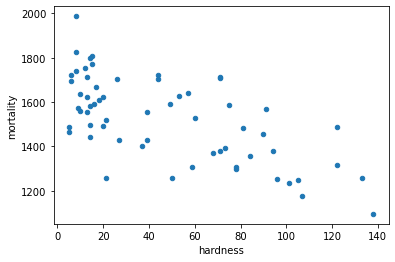

In [3]:
df.plot(kind='scatter', x='hardness', y='mortality')
# на первый взгляд наблюдается слабая обратная корреляция

In [4]:
# Рассчитаем коэффициент корреляции Пирсона
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [5]:
# Рассчитаем коэффициент корреляции Спирмена
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [6]:
# Рассчитаем коэффициент корреляции Кэнделла для понимания
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


Построим модель линейной регрессии

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df[['hardness']]
y = df['mortality']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [9]:
print(x_train.shape, y_train.shape)

(48, 1) (48,)


In [10]:
y_train.shape

(48,)

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [12]:
model.coef_
model.intercept_

1676.8049081969461

In [13]:
y_pred = model.predict(x_test)
y_pred

array([1620.92685931, 1657.08324388, 1647.22241173, 1548.61409017,
       1515.74464965, 1443.4318805 , 1410.56243998, 1344.82355894,
       1643.93546768, 1239.64134928, 1430.2841043 , 1223.20662902,
       1275.79773385])

In [14]:
# модель детерминации
model.score(x_test, y_test)

0.6687741298180702

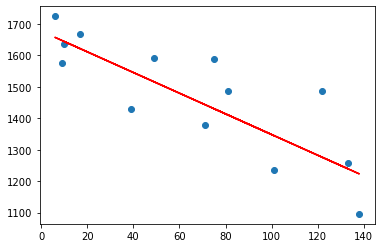

In [15]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

Построение модели линейной регрессии подтверждает тот факт, что наблюдается обратная корреляция. 
Также хочется отметить, что его построение дает ответ на взаимосвязь отношения смертности населения к жесткости воды, а именно: чем более жесткая вода, тем меньше смертность и наоборот, чем меньше жестность воды, тем больше смертность.
Правда построенная модель далека от идеальной (плюс очень большое количество остатков, которое можно увидеть ниже в Jupiter), следовательно прямой зависимости жесткости воды к смертности нет, явно есть еще параметры, влияющие на смертность. 

In [3]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [17]:
x_const = sm.add_constant(x_train) # добавляем константу руками
x_const.shape

(48, 2)

In [19]:
model = sm.OLS(y_train, x_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     25.02
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           8.74e-06
Time:                        22:46:55   Log-Likelihood:                -308.36
No. Observations:                  48   AIC:                             620.7
Df Residuals:                      46   BIC:                             624.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1676.8049     35.412     47.352      0.0

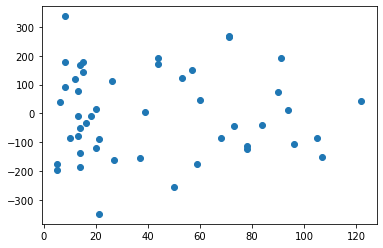

In [20]:
plt.scatter(x_const.iloc[:, 1], results.resid)

По остаткам видим, что их разброс хаотичен, что хорошо по его построению.

(array([ 1.,  1.,  7., 10.,  6.,  6.,  6.,  8.,  1.,  2.]),
 array([-347.7790831 , -279.35211037, -210.92513764, -142.49816491,
         -74.07119217,   -5.64421944,   62.78275329,  131.20972602,
         199.63669875,  268.06367149,  336.49064422]),
 <a list of 10 Patch objects>)

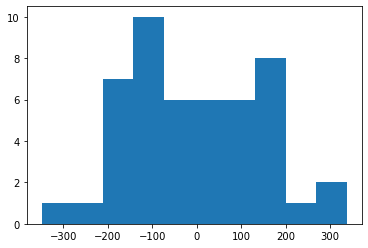

In [21]:
plt.hist(results.resid)

### 2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

    Разделить данные на 2 группы
    Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности


Проведем анализ данных по Югу:

In [4]:
filter_south = df['location'] == 'South'
filter_south = df.loc[filter_south].reset_index()
filter_south

,index,location,town,mortality,hardness
0,0,South,Bath,1247,105
1,2,South,Birmingham,1466,5
2,7,South,Bournemouth,1299,78
3,9,South,Brighton,1359,84
4,10,South,Bristol,1392,73
5,12,South,Cardiff,1519,21
6,13,South,Coventry,1307,78
7,14,South,Croydon,1254,96
8,18,South,East Ham,1318,122
9,19,South,Exeter,1260,21


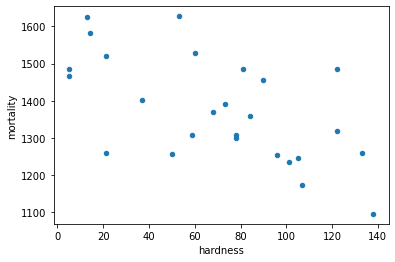

In [6]:
filter_south.plot(kind='scatter', x='hardness', y='mortality')
# на первый взгляд наблюдается слабая обратная корреляция

In [7]:
# Рассчитаем коэффициент корреляции Пирсона --- он уменьшился на 0,05 ---
filter_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [8]:
# Рассчитаем коэффициент корреляции Спирмена --- также наблюдается уменьшение коэф. корреляции ---
filter_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [9]:
# Рассчитаем коэффициент корреляции Кэнделла для понимания
filter_south[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.440315
mortality,-0.440315,1.000000


In [12]:
xs = filter_south[['hardness']]
ys = filter_south['mortality']

xs_train, xs_test, ys_train, ys_test = train_test_split(x, y, test_size=0.30, random_state=50)

model_s = LinearRegression()
model_s.fit(xs_train, ys_train)
model_s.coef_
model_s.intercept_

ys_pred = model_s.predict(xs_test)

model_s.score(xs_test, ys_test)

0.5403737075686553

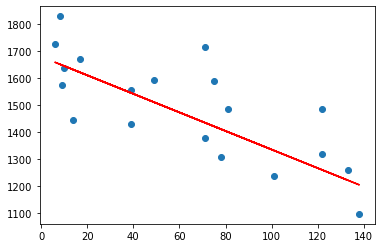

In [13]:
plt.scatter(xs_test, ys_test)
plt.plot(xs_test, ys_pred, c='r')

Наблюдаем примерную картину, что и в первоначальном анализе датасета. Остатки также визуально похожи

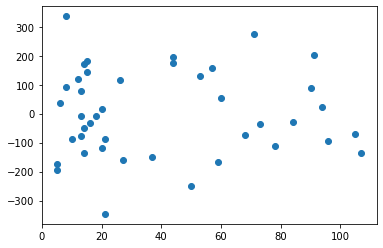

In [14]:
xs_const = sm.add_constant(xs_train) # добавляем константу руками
model_s = sm.OLS(ys_train, xs_const)
results_s = model_s.fit()

plt.scatter(xs_const.iloc[:, 1], results_s.resid)

(array([1., 1., 5., 9., 7., 4., 6., 6., 1., 2.]),
 array([-346.08762502, -277.85956146, -209.6314979 , -141.40343434,
         -73.17537078,   -4.94730722,   63.28075634,  131.5088199 ,
         199.73688345,  267.96494701,  336.19301057]),
 <a list of 10 Patch objects>)

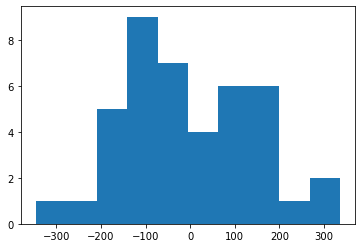

In [15]:
plt.hist(results_s.resid)

А теперь повторим все для Севера:

In [16]:
filter_North = df['location'] == 'North'
filter_North = df.loc[filter_North].reset_index()
filter_North

,index,location,town,mortality,hardness
0,1,North,Birkenhead,1668,17
1,3,North,Blackburn,1800,14
2,4,North,Blackpool,1609,18
3,5,North,Bolton,1558,10
4,6,North,Bootle,1807,15
5,8,North,Bradford,1637,10
6,11,North,Burnley,1755,12
7,15,North,Darlington,1491,20
8,16,North,Derby,1555,39
9,17,North,Doncaster,1428,39


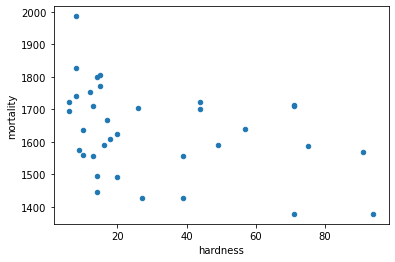

In [17]:
filter_North.plot(kind='scatter', x='hardness', y='mortality')
# на первый взгляд наблюдается слабая обратная корреляция или вообще отсутствует

In [18]:
# Рассчитаем коэффициент корреляции Пирсона
filter_North[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [19]:
# Рассчитаем коэффициент корреляции Спирмена --- также наблюдается уменьшение коэф. корреляции ---
filter_North[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [20]:
# Рассчитаем коэффициент корреляции Кэнделла для понимания
filter_North[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.283058
mortality,-0.283058,1.000000


In [21]:
xn = filter_North[['hardness']]
yn = filter_North['mortality']

xn_train, xn_test, yn_train, yn_test = train_test_split(x, y, test_size=0.30, random_state=50)

model_n = LinearRegression()
model_n.fit(xn_train, yn_train)
model_n.coef_
model_n.intercept_

yn_pred = model_n.predict(xn_test)

model_n.score(xn_test, yn_test)

0.5403737075686553

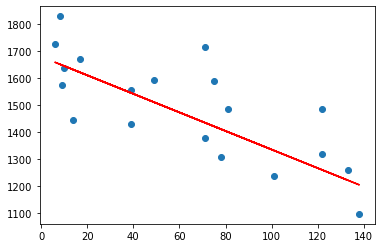

In [22]:
plt.scatter(xn_test, yn_test)
plt.plot(xn_test, yn_pred, c='r')

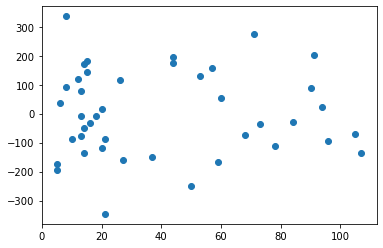

In [23]:
xn_const = sm.add_constant(xn_train) 
model_n = sm.OLS(yn_train, xn_const)
results_n = model_n.fit()

plt.scatter(xn_const.iloc[:, 1], results_n.resid)

(array([1., 1., 5., 9., 7., 4., 6., 6., 1., 2.]),
 array([-346.08762502, -277.85956146, -209.6314979 , -141.40343434,
         -73.17537078,   -4.94730722,   63.28075634,  131.5088199 ,
         199.73688345,  267.96494701,  336.19301057]),
 <a list of 10 Patch objects>)

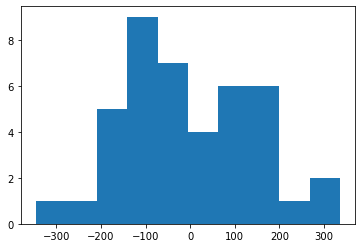

In [24]:
plt.hist(results_n.resid)

После разделения данных на две группы, на северные населенные пункты и южные, подтвердился факт зависимости (хоть и не явной) жесткости воды на смертность населения. Корреляция двух групп также повторяет первоначальный вид (обратная).